In [29]:
#Monte Car10 va1uation of European ca11 options with Numpy (log version)
# mcs_ full_ vector_numpy.py
#
import math
import numpy as np

from numpy import *
from time import time
# star import for shorter code
random.seed(20000)
t0 = time()
# Parameters
S0 = 100.; 
K = 105.; 
T = 1.0; 
r = 0.05; 
sigma = 0.2
M=50; 
dt = T /M; 
I = 250000

# Simu1ating I paths with M time steps
S = S0 * exp(cumsum((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt)* random.standard_normal((M + 1, I)),axis=0))# sum instead of cumsum would also do
# if on1y the fina1 va1ues are of interest
S[0] = S0

# Ca1cu1ating the Monte Carlo estimator
C0 = math.exp(-r * T) * sum(maximum(S[-1]-K, 0)) / I
             
# Results output
tnp2 = time() - t0
print ( 'European Option Value',"{:.2f}".format(C0))
print ('Duration in Seconds',"{:.2f}".format(tnp2) )


European Option Value 8.17
Duration in Seconds 1.65


，我们以阁形化的方式查看底层机制( matplotlib 绘图库的解释参见第 章) 首先，
我们绘制所有时间步上的前 10 条模拟路径

Text(0, 0.5, 'index level')

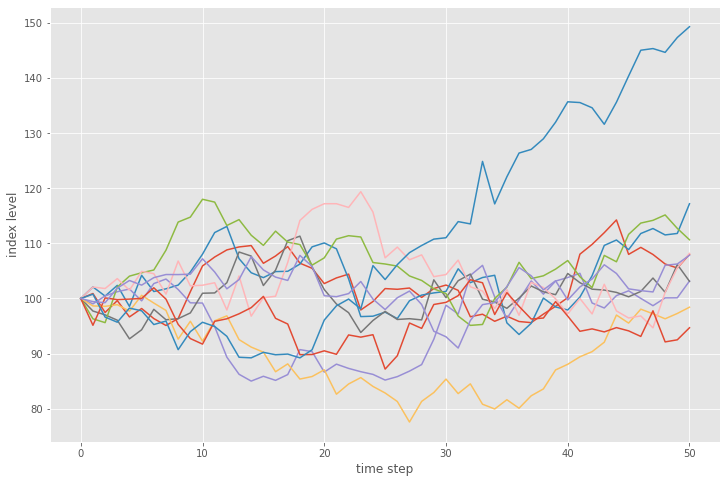

In [30]:
import matplotlib . pyplot as plt
plt.figure(figsize=(12,8))
plt.style.use('ggplot')
plt.plot(S[: , :10])
plt.grid(True)
plt.xlabel('time step')
plt.ylabel('index level') 

其次.我们想要查看模拟期结束时榄拟指数水平的频率 3-3 展示 输出，这次思:示
的是期末指数水平值的(近似)对数正态分布:

Text(0, 0.5, 'frequency')

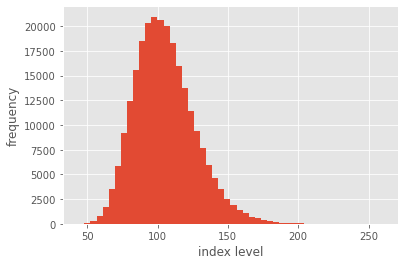

In [31]:
plt.hist(S[-1] , bins=50)
plt.grid(True)
plt.xlabel('index level')
plt.ylabel('frequency') 

期权期末(至IJ 期日)内在价值的同类图形看起来完全不同.如罔 3-4 所示:

(0.0, 50000.0)

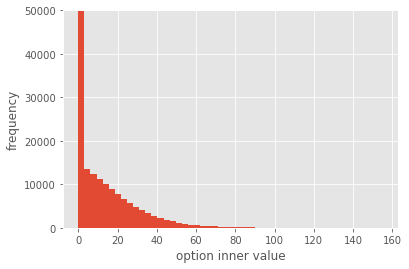

In [32]:
plt.hist(np.maximum(S[-1]-K ,0) , bins=50)
plt.grid(True)
plt.xlabel('option inner value')
plt.ylabel('frequency')
plt.ylim(0, 50000) 